In [1]:
# import packages
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak
import os
import sys
import hist

import vector
vector.register_awkward()

# set cms plot style
use_helvet = True  ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

sys.path.append("/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/lib")
from setting import setting

In [2]:
#config_path = "/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/cards/config_UL_alphavalidate_110to135.yml"
year = '2018'
import yaml
config_path = f"/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/cards/config_UL{year}.yml"
with open( config_path) as f:
    config = yaml.safe_load(f)

In [3]:
#make cut
def make_cut(selection,arr):
    r'''
    input: selection, arr as ak.Aarry()
    output: cuted arr with selection
    '''
    cut  = ak.numexpr.evaluate(selection,arr)
    return arr[cut]

#plot function
def plot_1d_data_mc(hist_dir,case,isdata = False,isdensity = False):
    r'''
        input: hist_dir, case, isdata, isdensity
        output: plot the histograms with hep.histplot
        case = 'resolved' or 'merged'
        isdata = True or False (default False)
        isdensity = True or False (default False)
    '''
    #create a list to stroe all keys in hist_dir as sample names except 'data'
    sample_names = [sample for sample in hist_dir.keys() if sample != 'data']
    #create a list to store all values in hist_dir as the histograms except 'data'
    histo_mc  = [hist_dir[sample] for sample in sample_names]
    #plot the mc histograms via hep.histplot
    #label is the list of sample names with retriving the number of events in each histogram
    #colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown','black']
    labels = ["{} ({})".format(sample,round(hist_dir[sample].values().sum(),4),'.4f') for sample in sample_names]
    if isdensity:
        #hep.histplot(histo_mc,label=labels, density=True,linewidth=1,color = [color for color in colors] )
        hep.histplot(histo_mc,label=labels, density=True,linewidth=1)
    else:
        hep.histplot(histo_mc,stack=True,label=labels,histtype='fill', edgecolor='k', linewidth=1,)
    
    if isdata:
        hep.histplot(hist_dir['Data'],label='Data', color='k', histtype='errorbar', linewidth=1.5,markersize=15)
    #set the x-axis label
    #plt.xlabel('M(2l2q) [GeV]')
    #plt.xlabel('particleNetZvsQCD')
    plt.xlabel('pt(ll)')
    #set the y-axis label
    plt.ylabel('Events')
    #set the legend
    plt.legend(loc='upper right',fontsize=10,fancybox=True,shadow=True)
    #set title with size
    #plt.title(f'Estimate M(2l2q) distribution in SR in {case} category with all possible backgrounds',fontsize=10)
    #plt.title(f'particleNetZvsQCD scroe with ZV process in pt range 600 To Inf GeV',fontsize=10)
    plt.title(f'pt2l',fontsize=10)

In [75]:
year = '2018'

#samples = ['DY_pt50To100','DY_pt100To250','DY_pt250To400','DY_pt400To650','DY_pt650ToInf','TTTo2L2Nu','WWTo2L2Nu','WZTo2Q2L','ZZTo2Q2L','WWTo1L1Nu2Q','tZq','ZZTo2L2Nu','WZTo1L1Nu2Q','ggh1000','ggh500','sig','ggh2000']
#samples = ['DY_pt50To100','DY_pt100To250','DY_pt250To400','DY_pt400To650','DY_pt650ToInf','TTTo2L2Nu','WWTo2L2Nu','WZTo2Q2L','ZZTo2Q2L','tZq','ggh1000','sig']
#samples = ['TTTo2L2Nu','tZq']
#samples = ['ggh125','ggh400','ggh450','ggh500','ggh550','ggh600','ggh700','ggh750','ggh800','ggh900','ggh1000','ggh2000','ggh2500','ggh3000',]
#samples = ['DY_pt50To100','DY_pt100To250','DY_pt250To400','DY_pt400To650','DY_pt650ToInf']
#samples = ['WWTo2L2Nu','ZZTo2Q2L','WZTo2Q2L']
samples = ['ggh']
arr = {}
sumweight = {}
n_events = {}
for sample in samples:
    #arr[sample] = uproot.lazy([f"{setting().fileset[year][sample][0]}:passedEvents"],filter_name = ['jet*','found*','KD*','Met','mass*','isMuMu','isEE'])
    #arr[sample] = uproot.lazy([f"{setting().fileset[year][sample][0]}:passedEvents"])
    arr[sample] = uproot.lazy([f"/cms/user/guojl/Sample/2L2Q/UL_Legacy/2018/MC/ggh/skimed/GluGluHToZZTo2L2Q_M1000_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root:passedEvents"])
    #arr[sample] = uproot.lazy([f"/cms/user/guojl/Sample/2L2Q/UL_Legacy/2018/MC/ggh/GluGluHToZZTo2L2Q_M1000_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root:Ana/passedEvents"])
    #arr[sample] = uproot.lazy([f"/cms/user/guojl/Sample/2L2Q/UL_Legacy/2018/MC/ggh/skimed/ggh.root:passedEvents"])
    
    #f = uproot.open(f"/cms/user/guojl/Sample/2L2Q/UL_Legacy/2018/MC/ggh/skimed/GluGluHToZZTo2L2Q_M1000_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root")['sumWeights']
    #f = uproot.open(f"/cms/user/guojl/Sample/2L2Q/UL_Legacy/2018/MC/ggh/skimed/ggh.root")['sumWeights']
    #sumweight[sample] = (f.to_boost()).sum()

    #f = uproot.open(setting().fileset[year][sample][0])['sumWeights']
    #sumweight[sample] = (f.to_boost()).sum()

    #f = uproot.open(setting().fileset[year][sample][0])['nEvents']
    #n_events[sample] = (f.to_boost()).sum()

    f.close()

#filelists = [f"{setting().fileset[year][sample][0]}:passedEvents" for sample in samples]
#arr['zv'] = uproot.lazy(filelists)

In [27]:
GENlep_1_pt = arr['ggh'].GENlep_pt[:,0]
GENlep_2_pt = arr['ggh'].GENlep_pt[:,1]

GENlep_1_eta = arr['ggh'].GENlep_eta[:,0]
GENlep_2_eta = arr['ggh'].GENlep_eta[:,1]

GENlep_1_phi = arr['ggh'].GENlep_phi[:,0]
GENlep_2_phi = arr['ggh'].GENlep_phi[:,1]

GENlep_1_mass = arr['ggh'].GENlep_mass[:,0]
GENlep_2_mass = arr['ggh'].GENlep_mass[:,1]

GENlep_1_id = arr['ggh'].GENlep_id[:,0]
GENlep_2_id = arr['ggh'].GENlep_id[:,1]

In [26]:
GENlep_1_id

<Array [224, 4.09, 114, ... 283, 122, 66.7] type='197000 * float64'>

### Deepjet uncertainties

In [7]:
from deepjet import DeepJet as dj

In [8]:
arr_cut = {}
selection = config['cut']['SR']['isMuMu']['resolved']['all']
for sample in samples:
    arr_cut[sample] = make_cut(selection,arr[sample])

In [67]:
temparr = arr_cut['ggh']

In [84]:
test_arr = ak.ones_like(temparr.jet_1_pt).to_numpy()

In [87]:
test_arr[0] = 99
test_arr[0]

99.0

In [11]:
#with each btag event, get SFs based on jet flavor information
#check with b tagged cut 
#if event.jet_1_deepbtag>self.btagWP and event.jet_2_deepbtag>self.btagWP:
#jet 1 
#open eff file
f_eff = uproot.open(f"/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/deepjetSFsfiles/{year}/btag_eff_ggh.root")

In [12]:
h = f_eff['eff_b'].to_hist()

In [31]:
help(ak.mask)

Help on function mask in module awkward.operations.structure:

mask(array, mask, valid_when=True, highlevel=True, behavior=None)
    Args:
        array: Data to mask, rather than filter.
        mask (array of booleans): The mask that overlays elements in the
            `array` with None. Must have the same length as `array`.
        valid_when (bool): If True, True values in `mask` are considered
            valid (passed from `array` to the output); if False, False
            values in `mask` are considered valid.
        highlevel (bool): If True, return an #ak.Array; otherwise, return
            a low-level #ak.layout.Content subclass.
        behavior (None or dict): Custom #ak.behavior for the output array, if
            high-level.
    
    Returns an array for which
    
        output[i] = array[i] if mask[i] == valid_when else None
    
    Unlike filtering data with #ak.Array.__getitem__, this `output` has the
    same length as the original `array` and can therefore be

In [64]:
#def get_eff(jet_pt,jet_eta):
#    r'''
#    input: jet_pt, jet_eta as format ak.Array()
#    output: eff as ak.Array()
#    hist eff is a 2D histogram as function of pt and eta 
#    find the bin of pt and eta, get the eff value for each event
#    '''
eff = ak.Array([h[hist.loc(pt),hist.loc(eta)] for pt,eta in zip(temparr.jet_1_pt,abs(temparr.jet_1_eta))])
eff

<Array [0.826, 0.873, 0.869, ... 0.873, 0.872] type='5183 * float64'>

In [65]:
1-eff

<Array [0.174, 0.127, 0.131, ... 0.127, 0.128] type='5183 * float64'>

In [33]:
temparr['w_btag'] = ak.zeros_like(temparr.jet_1_pt)
ak.mask(temparr, temparr.jet_1_deepbtag>0.3093)

<Array [None, None, None, ... w_btag: 0}] type='5183 * ?{"pConst_GG_SIG_ghg2_1_g...'>

In [53]:
selection = "(jet_1_deepbtag>=0.3093) & (jet_2_deepbtag<0.3093) & (jet_2_hadronflavor == 5)"
cut = ak.numexpr.evaluate(selection,temparr)
arr_case1 = temparr[cut]

In [56]:
arr_case1['eff_btag'] = ak.Array([h[hist.loc(pt),hist.loc(eta)] for pt,eta in zip(arr_case1.jet_1_pt,abs(arr_case1.jet_1_eta))])
arr_case1['eff_btag']

<Array [0.86, 0.873, 0.872, ... 0.812, 0.872] type='157 * float64'>

In [57]:
selection = "(jet_1_deepbtag<0.3093) & (jet_2_deepbtag<0.3093) & (jet_2_hadronflavor == 5)"
cut = ak.numexpr.evaluate(selection,temparr)
arr_case2 = temparr[cut]

In [58]:
arr_case2['eff_btag'] = ak.Array([h[hist.loc(pt),hist.loc(eta)] for pt,eta in zip(arr_case2.jet_1_pt,abs(arr_case2.jet_1_eta))])

In [59]:
arr_con = ak.concatenate([arr_case1,arr_case2])

In [63]:
arr_con.eff_btag

<Array [0.86, 0.873, 0.872, ... 0.869, 0.86] type='188 * float64'>

In [ ]:
#temp_array = ak.concatenate([arr_cut['WWTo2L2Nu'],arr_cut['WZTo2Q2L'],arr_cut['ZZTo2Q2L']])
temp_array = ak.concatenate([arr_cut['TTTo2L2Nu'],arr_cut['tZq']])
#temp_array = ak.concatenate([arr_cut['TTTo2L2Nu'],arr_cut['tZq']])
#temp_array = arr_cut['ggh1000']
dj_helper = dj(year,temp_array)
sf_jet1,sf_jet2 = dj_helper.get_deepjet_sf('central')
#compute corelated uncertainty for deepjet SFs.
sf_jet1_up,sf_jet2_up = dj_helper.get_deepjet_sf('up_correlated')
sf_jet1_down,sf_jet2_down = dj_helper.get_deepjet_sf('down_correlated')
sf_certral = (sf_jet1+sf_jet2).sum()
sf_up = (sf_jet1_up+sf_jet2_up).sum()
sf_down = (sf_jet1_down+sf_jet2_down).sum()
uncertainty_up = abs(sf_up-sf_certral)/sf_certral
uncertainty_down = abs(sf_down-sf_certral)/sf_certral

print(f'correlated uncertainty = {1+uncertainty_up}/{1-uncertainty_down}')

#compute uncorelated uncertainty for deepjet SFs.
sf_jet1_up,sf_jet2_up = dj_helper.get_deepjet_sf('up')
sf_jet1_down,sf_jet2_down = dj_helper.get_deepjet_sf('down')
sf_certral = (sf_jet1+sf_jet2).sum()
sf_up = (sf_jet1_up+sf_jet2_up).sum()
sf_down = (sf_jet1_down+sf_jet2_down).sum()
uncertainty_up = abs(sf_up-sf_certral)/sf_certral
uncertainty_down = abs(sf_down-sf_certral)/sf_certral

print(f'uncorrelated uncertainty = {1+uncertainty_up}/{1-uncertainty_down}')

correlated uncertainty = 1.010756492147108/0.9892435078528918
uncorrelated uncertainty = 1.014534651977932/0.9854653480220681


In [5]:
arr['ggh4l400'].fields

KeyError: 'ggh4l400'

### draw some variables for testing

Text(0, 1, 'Unity')

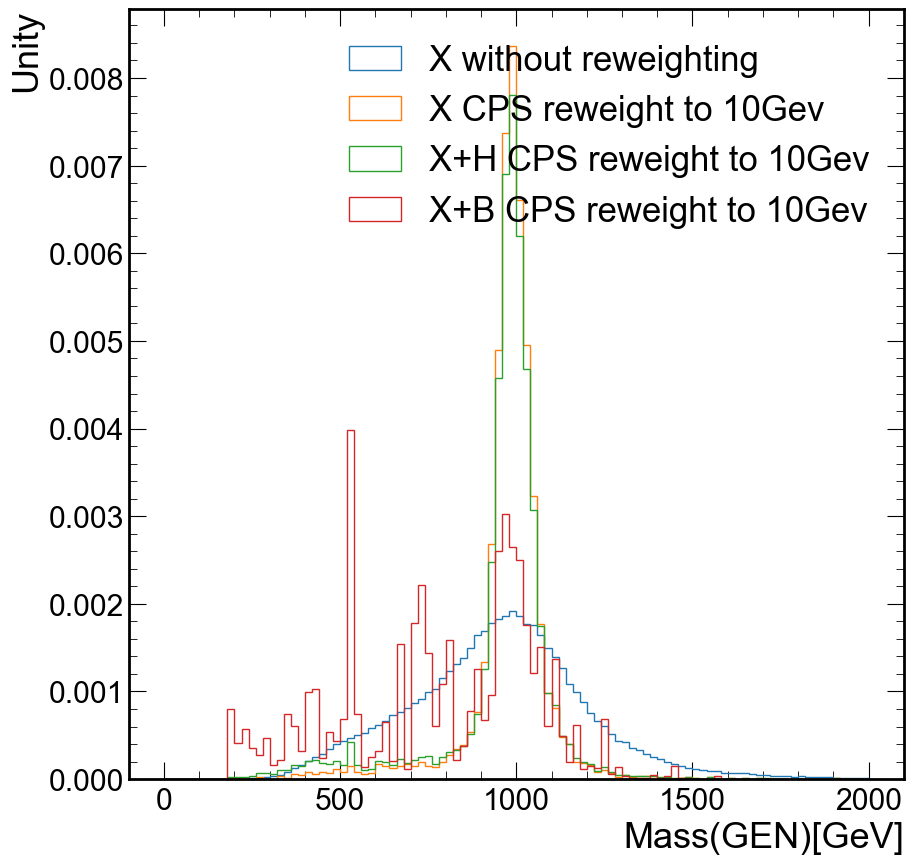

In [14]:
# plot arr[CPStoBW_GaH10_PropRewgt]
sample = 'ggh1000'
ifdensity = True
#temp_array = ak.concatenate([arr['ggh1000'],arr['ggh400']])
temp_array = arr['ggh1000']
min_x_bin = 0; max_x_bin = 2000; n_x_bin = 100
#plt.hist(arr['ggh2000'].GEN_H1_mass, bins=100, range=(0,3000), histtype='step', label='ggh2000',weights=arr['ggh2000'].p_Gen_CPStoBW_GaH200_PropRewgt*arr['ggh2000'].p_Gen_GG_SIG_HM_kappa2TopBot_1_gh2z1_1_MCFM)
plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X without reweighting',   density=ifdensity)
plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X CPS reweight to 10Gev',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt)
plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+H CPS reweight to 10Gev',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_SIG_H125_kappaTopBot_1_ghz1_1_HM_kappa2TopBot_1_gh2z1_1_MCFM/temp_array.p_Gen_GG_SIG_HM_kappa2TopBot_1_gh2z1_1_MCFM)
plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+B CPS reweight to 10Gev',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_BSI_HM_kappa2TopBot_1_gh2z1_1_MCFM/temp_array.p_Gen_GG_SIG_HM_kappa2TopBot_1_gh2z1_1_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='test',   density=ifdensity,weights=  temp_array.p_Gen_GG_SIG_H125_kappaTopBot_1_ghz1_1_HM_kappa2TopBot_1_gh2z1_1_MCFM*temp_array.p_Gen_CPStoBW_GaH10_PropRewgt)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X to H ',   density=ifdensity,weights=  temp_array.p_Gen_GG_SIG_H125_kappaTopBot_1_ghz1_1_HM_kappa2TopBot_1_gh2z1_1_MCFM/temp_array.p_Gen_GG_SIG_HM_kappa2TopBot_1_gh2z1_1_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+H+B', density=ifdensity,weights=temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_SIG_H125_kappaTopBot_1_ghz1_1_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+B',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_BSI_HM_kappa2TopBot_1_gh2z1_1_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+B',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_BKG_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X',     density=ifdensity,weights=    temp_array.p_Gen_CPStoBW_GaH10_PropRewgt)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X prue',density=ifdensity)
plt.legend(loc='upper right',fontsize=25,fancybox=True,shadow=True)
plt.xlabel('Mass(GEN)[GeV]')
plt.ylabel('Unity')
#add text to note mass X = 2000 GeV in the middle of the plot
#plt.text(2500, 0.007, 'mX = 2000 GeV', fontsize=20)
#plt.text(2500, 0.0064, r'$\Gamma(X)  = 100 GeV$', fontsize=20)

In [15]:
plt.close()

In [ ]:
# plot arr[CPStoBW_GaH10_PropRewgt]
sample = 'ggh400'
ifdensity = True
#temp_array = ak.concatenate([arr['ggh1000'],arr['ggh400']])
temp_array = arr['ggh1000']
min_x_bin = 0; max_x_bin = 2000; n_x_bin = 100
#creat hist with weights

#plt.hist(arr['ggh2000'].GEN_H1_mass, bins=100, range=(0,3000), histtype='step', label='ggh2000',weights=arr['ggh2000'].p_Gen_CPStoBW_GaH200_PropRewgt*arr['ggh2000'].p_Gen_GG_SIG_HM_kappa2TopBot_1_gh2z1_1_MCFM)
plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+H',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt)
plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+H',   density=ifdensity,weights=  temp_array.p_Gen_GG_BSI_HM_kappa2TopBot_1_gh2z1_1_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+H+B', density=ifdensity,weights=temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_SIG_H125_kappaTopBot_1_ghz1_1_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+B',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_BSI_HM_kappa2TopBot_1_gh2z1_1_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+B',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_BKG_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X',     density=ifdensity,weights=    temp_array.p_Gen_CPStoBW_GaH10_PropRewgt)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X prue',density=ifdensity)
plt.legend(loc='upper right',fontsize=25,fancybox=True,shadow=True)
plt.xlabel('Mass(GEN)[GeV]')
plt.ylabel('Unity')
#add text to note mass X = 2000 GeV in the middle of the plot
#plt.text(2500, 0.007, 'mX = 2000 GeV', fontsize=20)
#plt.text(2500, 0.0064, r'$\Gamma(X)  = 100 GeV$', fontsize=20)

### Make cut

In [42]:
arr_cut = {}; cutcat = '2lep'; cat = 'resolved'; tag = 'all'
#selection  = config['cut'][cat]['net']['SR'][cutcat][tag]
#selection = config['cut']['resolved']['SR']['2lep']['all']
selection = config['cut']['SR']['2lep']['resolved']['all']
#selection = "((massmerged>70) & (massmerged<105)) & (particleNetZvsQCD>0.9) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)"
#add_cut = " & (jet_1_eta>-3) & (jet_1_eta<-1.3) & (jet_2_eta>-3) & (jet_2_eta<-1.3) & (jet_1_phi>-1.57) & (jet_1_phi<-0.87) & (jet_2_phi>-1.57) & (jet_2_phi<-0.87)"
add_cut = " & (jet_2_eta>-3) & (jet_2_eta<-1.3) & (jet_2_phi>-1.57) & (jet_2_phi<-0.87)"
selection = selection + add_cut
for sample in samples:
    arr_cut[sample] = make_cut(selection,arr[sample])

In [43]:
#make a 2D histo to store the jet_1_eta vs jet_1_phi
hist2d = hist.Hist(
            hist.axis.Regular(30, -3, 0),
            hist.axis.Regular(20, -2, 0),
        )
#fill the hist2d with arr_cut
hist2d.fill(arr_cut[sample].jet_1_eta, arr_cut[sample].jet_1_phi)

#plot the 2D histo
fig, ax = plt.subplots()
hist2d.plot2d(ax=ax)
#set the x-axis label
plt.xlabel('jet_1_eta')
#set the y-axis label
plt.ylabel('jet_1_phi')
#set the legend
plt.legend(loc='upper right',fontsize=10,fancybox=True,shadow=True)

#plot a red line box to show the cut region in the 2D histo
#cut region: -3<jet_1_eta<-1.3, -1.57<jet_1_phi<-0.87
plt.plot([-3,-1.3,-1.3,-3,-3],[-1.57,-1.57,-0.87,-0.87,-1.57],color='red')

#plot 2D histo jet_1_eta vs jet_1_phi

#plt.hist(arr_cut['Data'].jet_1_eta, bins=100, range=(-3,-1.3), histtype='step', label='Data',density=True)
#plt.hist(arr_cut['Data'].jet_1_phi, bins=100, range=(-1.57,-0.87), histtype='step', label='Data',density=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


: 

### Efficency study

NameError: name 'cutcat' is not defined

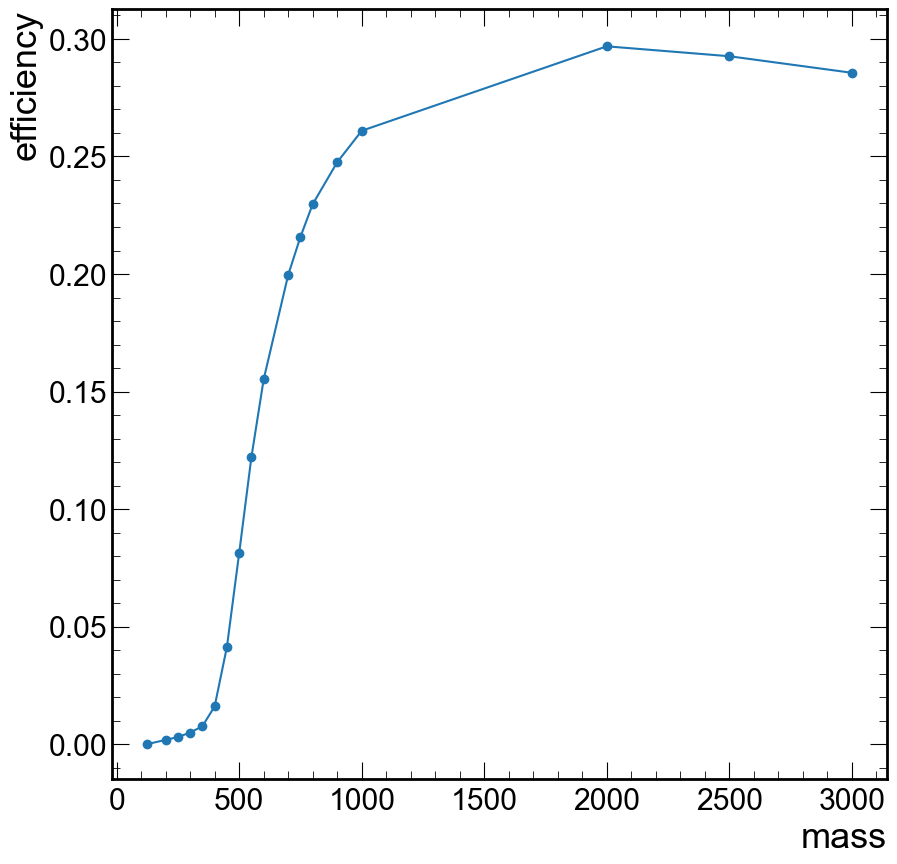

In [27]:
eff = []
eff_err_y = []
eff_err_x = []
massList = [125,200,250,300,350,400,450,500,550,600,700,750,800,900,1000,2000,2500,3000]
for sample in samples:
    #print(f'eff {sample}  = {len(arr_cut[sample].mass2lj)/n_events[sample]}')
    n_reco = len(arr_cut[sample].mass2lj)
    n_gen = n_events[sample]

    err_reco = np.sqrt(n_reco)
    err_gen = np.sqrt(n_gen)

    err_eff = np.sqrt((err_reco/n_gen)**2+(n_reco*err_gen/n_gen**2)**2)

    eff_err_y.append(err_eff)
    eff_err_x.append(0)
    eff.append(n_reco/n_gen)
    #plot eff vs mass without line with error bar
# check size of eff and massList
#print(eff)
#print(massList)
plt.errorbar(massList,eff,yerr=eff_err_y,xerr=eff_err_x,label=f'eff merged',marker='o',)
#plt.plot(massList,eff,label=f'eff_{cutcat}_{cat}_{tag}',marker='o',)
plt.xlabel('mass')
plt.ylabel('efficiency')
plt.title(f'{cutcat} {cat} {tag}')
#set legend position and size
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop={'size': 6})
#plt.savefig(f'eff_{cutcat}_{cat}_{tag}.png')
plt.close()

In [15]:
#len(arr['ggh200'].GEN_H1_mass)
#len(arr_cut['ggh200'].GEN_H1_mass)
#print(f'eff ggh200  = {len(arr_cut["ggh200"].GEN_H1_mass)/len(arr["ggh200"].GEN_H1_mass)}')
print(f'eff ggh200  = {len(arr_cut["ggh200"].mass2lj)/n_events["ggh200"]}')
print(f'eff ggh300  = {len(arr_cut["ggh300"].mass2lj)/n_events["ggh300"]}')

eff ggh200  = 0.0018050541516245488
eff ggh300  = 0.0048952879581151834


## compare kinematic in in control and validation region

In [10]:
#make cut 
arr_cr = {}
selection_cr = config['cut']['resolved']['CR']['2lep']['all']
for sample in samples:
    arr_cr[sample] = make_cut(selection_cr,arr[sample])

#make cut 
arr_vr = {}
selection_vr = config['cut']['resolved']['VR']['2lep']['all']
for sample in samples:
    arr_vr[sample] = make_cut(selection_vr,arr[sample])

In [9]:
#check varbs
#varb = 'KD_jjVBF' #
varb = 'pt2l' #
#fill hist
bins = 100; start = 0; stop = 1000
lumi = config['lumi']['2018']
h_cr = {}
h_vr = {}
for sample in samples:
    xsec = config['samples_inf'][sample][1]
    h_cr[sample] = hist.Hist(hist.axis.Regular(bins,start,stop))
    h_cr[sample].fill(
        arr_cut[sample][varb],
        weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000*{xsec}/{sumweight[sample]}',arr_cut[sample])
    )
    #
    #h_vr[sample] = hist.Hist(hist.axis.Regular(bins,start,stop))
    #h_vr[sample].fill(
    #    arr_vr[sample][varb],
    #    weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000*{xsec}/{sumweight[sample]}',arr_vr[sample])
    #)


In [10]:
#combine
zjet_cr = h_cr['DY_pt50To100']+h_cr['DY_pt100To250']+h_cr['DY_pt250To400']+h_cr['DY_pt400To650']+h_cr['DY_pt650ToInf']
#zjet_vr = h_vr['DY_pt50To100']+h_vr['DY_pt100To250']+h_vr['DY_pt250To400']+h_vr['DY_pt400To650']+h_vr['DY_pt650ToInf']

#ttbar_cr = h_cr["TTTo2L2Nu"]+h_cr['tZq']
#ttbar_vr = h_vr["TTTo2L2Nu"]+h_vr['tZq']
#
#zv_cr = h_cr['WZTo2Q2L']+h_cr['ZZTo2Q2L']+h_cr["WWTo2L2Nu"]
#zv_vr = h_vr['WZTo2Q2L']+h_vr['ZZTo2Q2L']+h_vr["WWTo2L2Nu"]

ggh_cr = h_cr['ggh1000']
#ggh_vr = h_vr['ggh1000']

Text(0.5, 1.0, 'ptll')

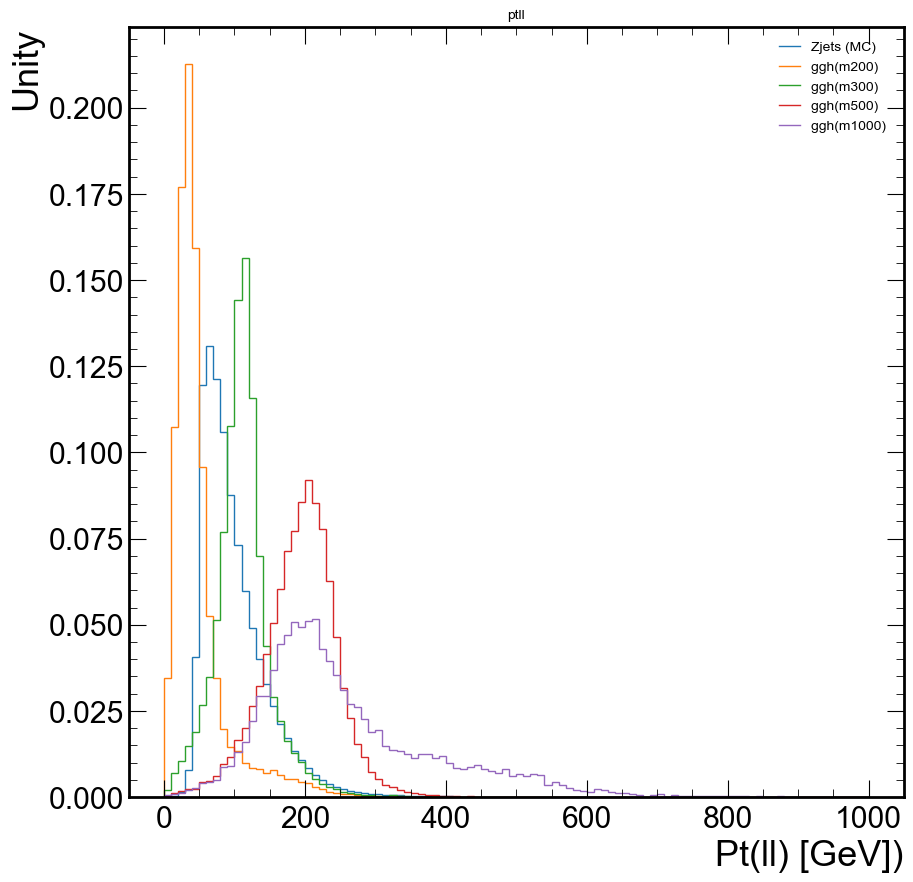

In [11]:
#plot
#hep.histplot([zjet_cr,zjet_vr],label=['zjet CR','zjet VR'], density=True,linewidth=1)
#hep.histplot([ttbar_cr,ttbar_vr],label=['ttbar,tZq CR','ttbar,tZq VR'], density=True,linewidth=1)
#hep.histplot([zv_cr,zv_vr],label=['ZV,WW CR','ZV,WW VR'], density=True,linewidth=1)
hep.histplot([zjet_cr,h_cr['ggh200'],h_cr['ggh300'],h_cr['ggh500'],h_cr['ggh1000']],label=['Zjets (MC)','ggh(m200) ','ggh(m300) ','ggh(m500) ','ggh(m1000) '], density=True,linewidth=1)
plt.xlabel('Pt(ll) [GeV])')
plt.ylabel('Unity')
plt.legend(loc='upper right',fontsize=10,fancybox=True,shadow=True)
plt.title(f'ptll',fontsize=10)
#plt.savefig(f'./plots/kd_ggh.png')

In [114]:
plt.close()

## check pt2l

In [4]:
#make cut
#siganl
selection = "(foundZ1LCandidate==True)"
#selection = "((massmerged>70) & (massmerged<105)) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True) & (particleNetZvsQCD>0.9)"
arr_cut = {}
for sample in samples:
    cut = ak.numexpr.evaluate(selection,arr[sample])
    arr_cut[sample] = arr[sample][cut]

In [5]:
#fill hist
lumi = config['lumi']['2018']
h = {}
for sample in samples:
    xsec = config['samples_inf'][sample][1]
    h[sample] = hist.Hist(hist.axis.Regular(80, 0,800))
    h[sample].fill(
        arr_cut[sample].pt2l,
        weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000*{xsec}/{sumweight[sample]}',arr_cut[sample])
    )

In [6]:
hist_dir = {
    'TT,tZq':h["TTTo2L2Nu"]+h['tZq'],
    #'WWTo2L2Nu':h["WWTo2L2Nu"],
    'ZV,WW':h['WZTo2Q2L']+h['ZZTo2Q2L']+h["WWTo2L2Nu"],
    'Z+jet':h['DY_pt50To100']+h['DY_pt100To250']+h['DY_pt250To400']+h['DY_pt400To650']+h['DY_pt650ToInf'] 
}

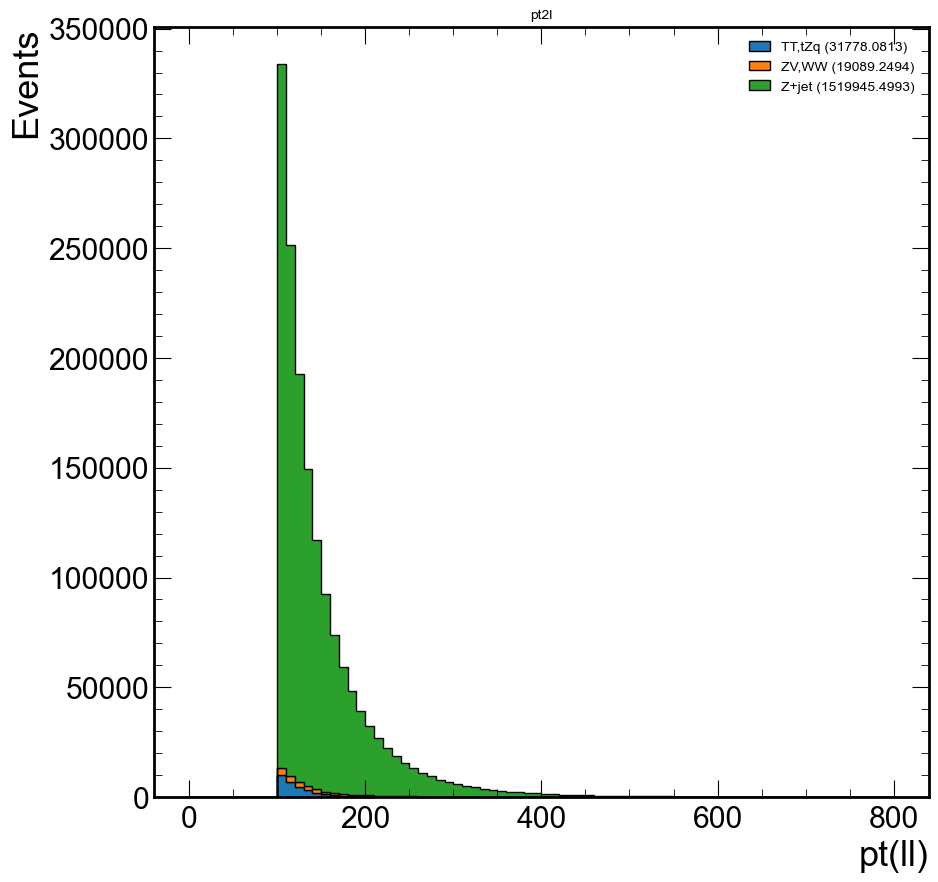

In [9]:
plot_1d_data_mc(hist_dir,'2lep')

## check 2D template

In [104]:
#make cut
#siganl
selection = "((mass2jet>70) & (mass2jet<105)) & (foundZ1LCandidate==True) & (foundZ2JCandidate==True)"
#selection = "((massmerged>70) & (massmerged<105)) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True) & (particleNetZvsQCD>0.9)"
arr_cut = {}
for sample in samples:
    cut = ak.numexpr.evaluate(selection,arr[sample])
    arr_cut[sample] = arr[sample][cut]

In [105]:
#fill 2D
lumi = config['lumi']['2018']
temp_bin1 = np.linspace(0,1200,25)
#temp_bin2 = np.array([1300,1400,1500,1600,2000,2400,3000,3500,5000])
temp_bin2 = np.array([1300,1400,1500,1600,3500])
bins = np.concatenate((temp_bin1,temp_bin2))
massZZ_bins = hist.axis.Variable(ak.from_numpy(bins).to_list())
h = {}
for sample in samples:
    xsec = config['samples_inf'][sample][1]
    h[sample] = hist.Hist(massZZ_bins,hist.axis.Regular(10, 0, 1))
    h[sample].fill(
        arr_cut[sample].mass2l2jet,
        #arr_cut[sample].mass2lj,
        arr_cut[sample].KD_Zjj,
        weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000*{xsec}/{sumweight[sample]}',arr_cut[sample])
        #weight=ak.ones_like(arr_cut[sample].EventWeight)
    )

In [106]:
his = h['WWTo2L2Nu'] + h['WZTo2Q2L'] + h['ZZTo2Q2L']
#his = h['DY_pt50To100'] + h['DY_pt100To250'] + h['DY_pt250To400'] +h['DY_pt400To650'] + h['DY_pt650ToInf']
#his = h['TTTo2L2Nu'] + h['tZq']
#his = h['sig']

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fab7ab71310>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fab7ab39d30>, text=[])

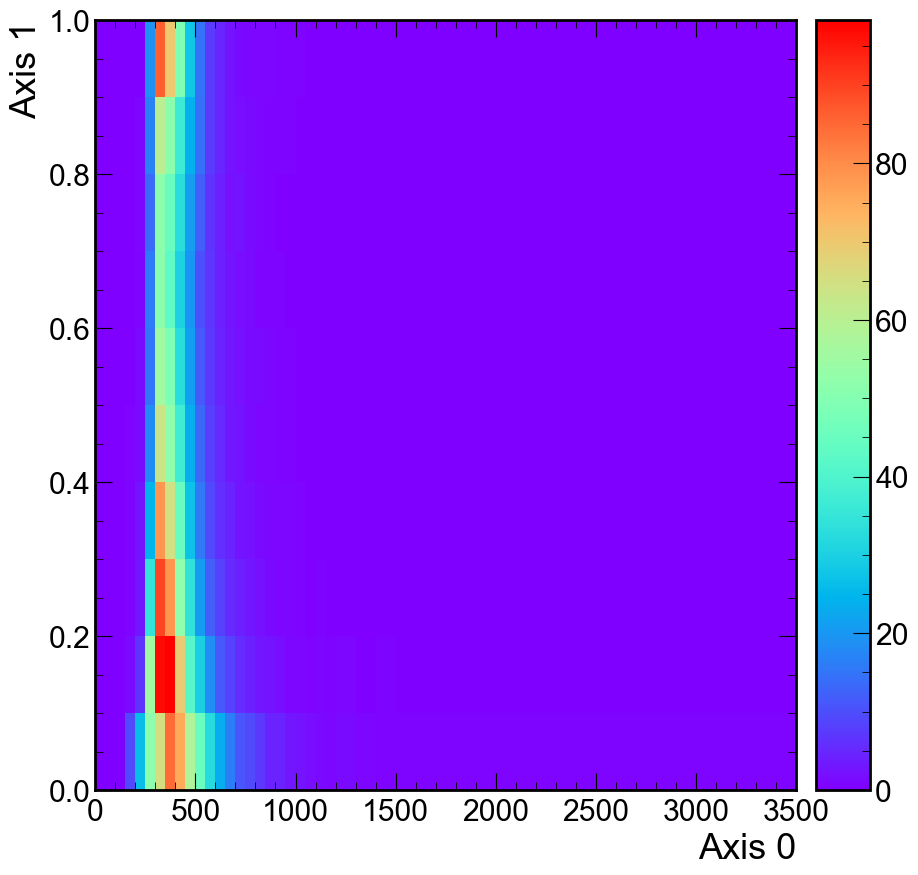

In [107]:
his.plot2d(cmap='rainbow')

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fab793d2220>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fab795287f0>, text=[])

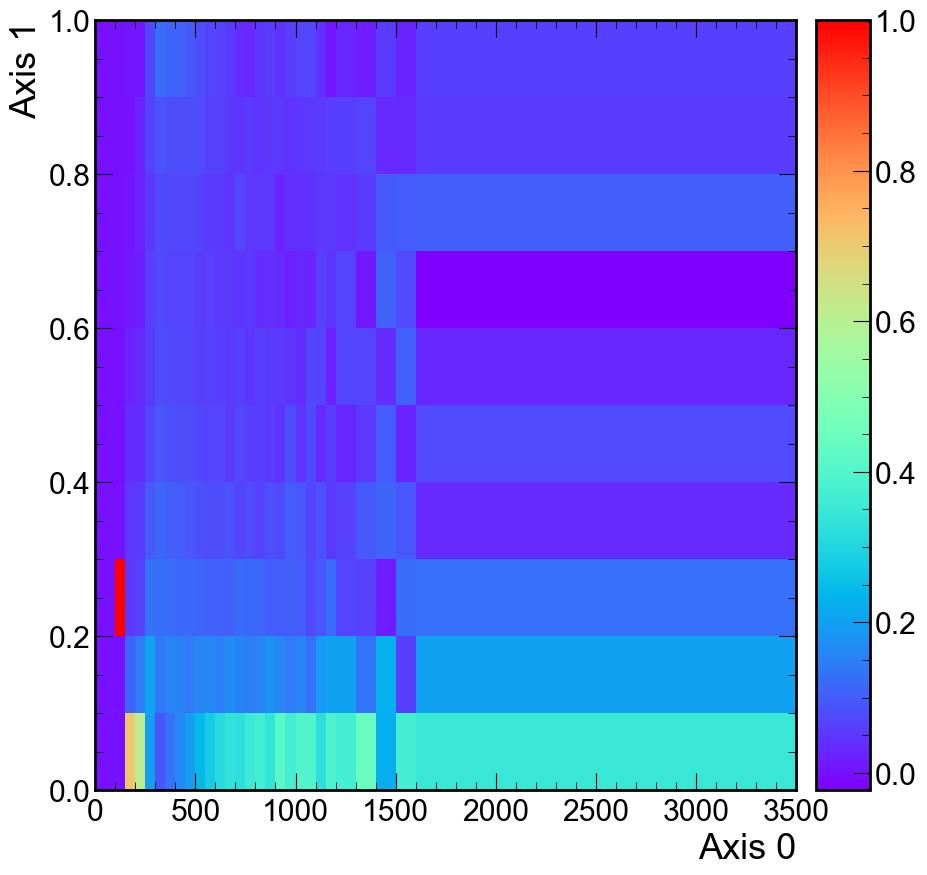

In [108]:
xbins = his.axes[0].size
h_norm = Conditional_norm_2Dhisto(his,xbins)
h_norm.plot2d(cmap='rainbow')

In [52]:
def Conditional_norm_2Dhisto(h,nbins):
    temp_h = h
    for bin in range(0,nbins):
        nevents = temp_h[bin,:].values().sum()
        if(nevents==0.0): continue
        #temp_h.view(flow=False).value[bin,:]  = np.nan_to_num(temp_h.view(flow=False).value[bin,:],0.0)
        temp_h.view()[bin,:] = temp_h.view()[bin,:]/nevents
    return temp_h

In [39]:
xbins = h.axes[0].size
h_norm = Conditional_norm_2Dhisto(h,xbins)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fab07baa1f0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fab07bb6640>, text=[])

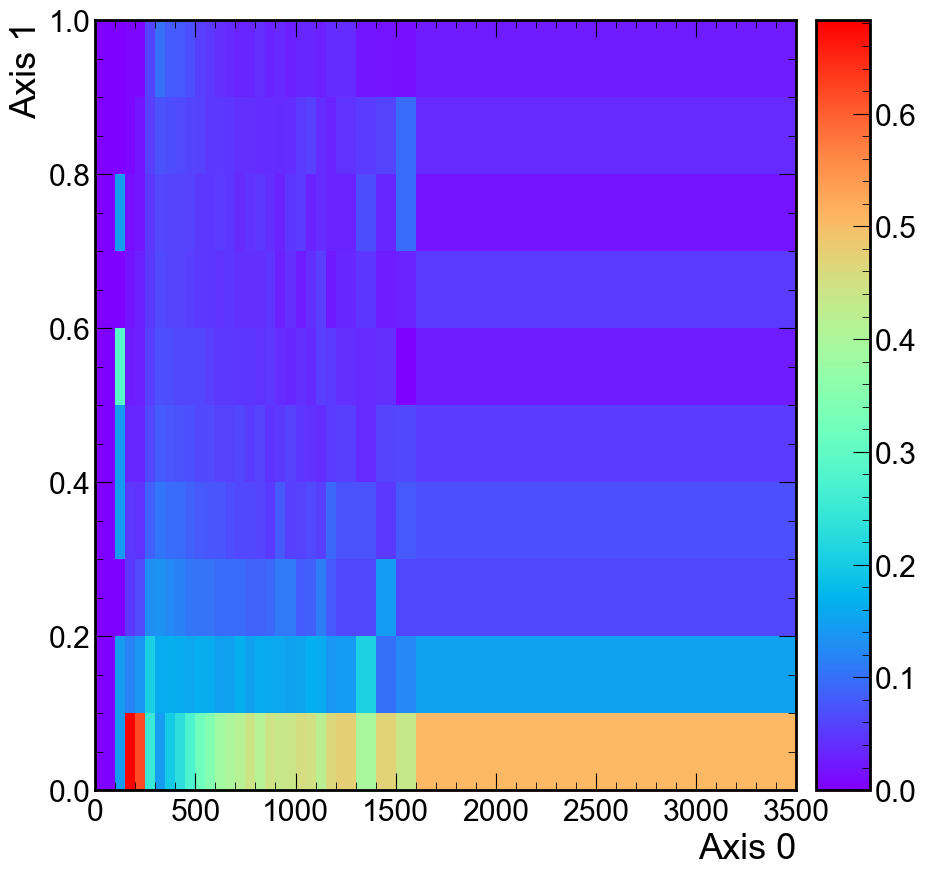

In [40]:
h_norm.plot2d(cmap='rainbow')

## Plot a 2D plot for MZZ and MJ separately in SR and SB region with signal sample

### cut on siganl and side-band region

In [10]:
#siganl
selection = "((massmerged>70) & (massmerged<105)) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True) & (particleNetZvsQCD>0.9)"
arr_cut_SR = {}
for sample in samples:
    cut = ak.numexpr.evaluate(selection,arr[sample])
    arr_cut_SR[sample] = arr[sample][cut]
    
selection = "((massmerged<70) | (massmerged>105)) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True) & (particleNetZvsQCD>0.9)"
arr_cut_SB = {}
for sample in samples:
    cut = ak.numexpr.evaluate(selection,arr[sample])
    arr_cut_SB[sample] = arr[sample][cut]


### Fill 2D. massZZ VS MJ histogram

In [7]:
h = hist.Hist(hist.axis.Regular(bins=50, start=500, stop=3000),hist.axis.Regular(bins=14, start=40, stop=180))
h.fill(arr_cut_SB['ggh'].mass2lj,arr_cut_SB['ggh'].massmerged)

Hist(
  Regular(50, 500, 3000, label='Axis 0'),
  Regular(14, 40, 180, label='Axis 1'),
  storage=Double()) # Sum: 186892.0 (192468.0 with flow)

Text(0, 1, 'M(J)')

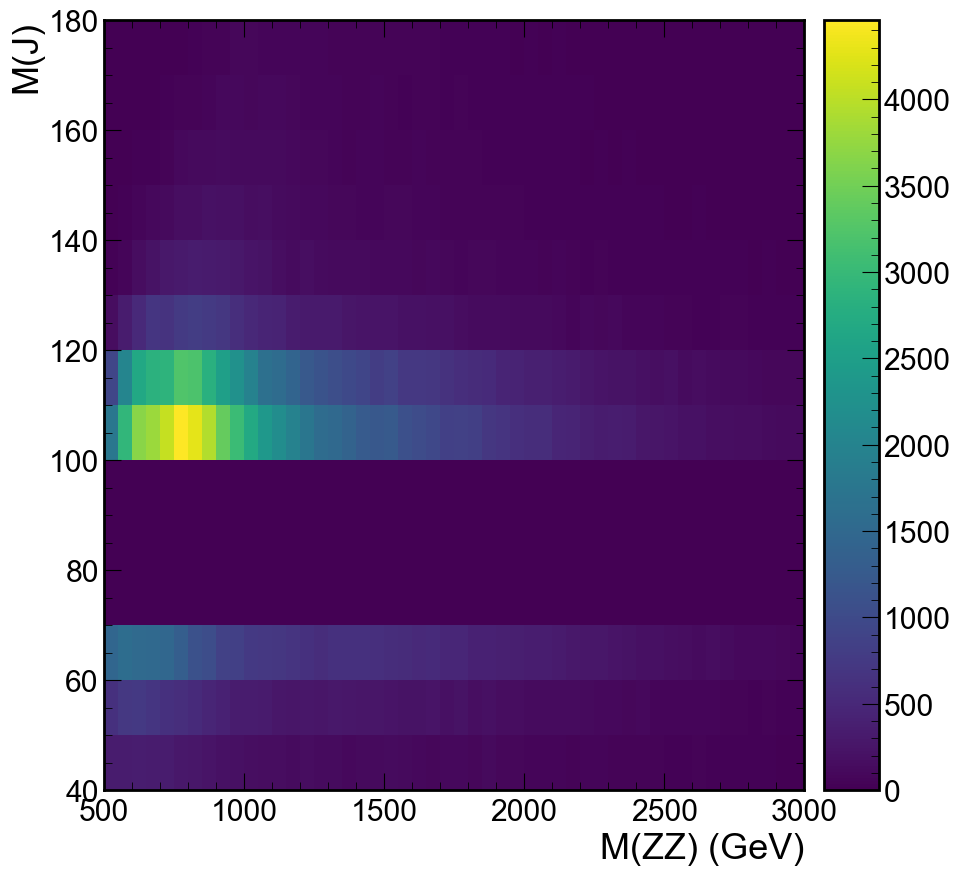

In [8]:
h.plot2d()
#set title and axis labels
plt.xlabel('M(ZZ) (GeV)')
plt.ylabel('M(J)')

##  comparison plots for the kinematics for the mZZ in the signal and sideband region.

### make cut

In [30]:
#siganl
selection = "((mass2jet>70) & (mass2jet<105)) & (foundZ1LCandidate==True) & (foundZ2JCandidate==True)"
arr_cut_SR = {}
for sample in samples:
    cut = ak.numexpr.evaluate(selection,arr[sample])
    arr_cut_SR[sample] = arr[sample][cut]
    
selection = "((mass2jet<70) | (mass2jet>105)) & (foundZ1LCandidate==True) & (foundZ2JCandidate==True)"
arr_cut_SB = {}
for sample in samples:
    cut = ak.numexpr.evaluate(selection,arr[sample])
    arr_cut_SB[sample] = arr[sample][cut]

### Fill Histogram for ZJet

In [42]:
lumi = config['lumi']['2018']
bins = 20; start = -5; stop = 5
#mass2l2q
h_SR = hist.Hist(hist.axis.Regular(bins=bins, start=start, stop=stop))
for sample in samples:
    xsec = config['samples_inf'][sample][1]
    h_SR.fill(arr_cut_SR[sample].eta2l2jet,
              weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000*{xsec}/{sumweight[sample]}',arr_cut_SR[sample])
             )

h_SB = hist.Hist(hist.axis.Regular(bins=bins, start=start, stop=stop))
for sample in samples:
    xsec = config['samples_inf'][sample][1]
    h_SB.fill(arr_cut_SB[sample].eta2l2jet,
             weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000*{xsec}/{sumweight[sample]}',arr_cut_SB[sample])
             )

Text(1, 0, 'Eta_ZZ (GeV)')

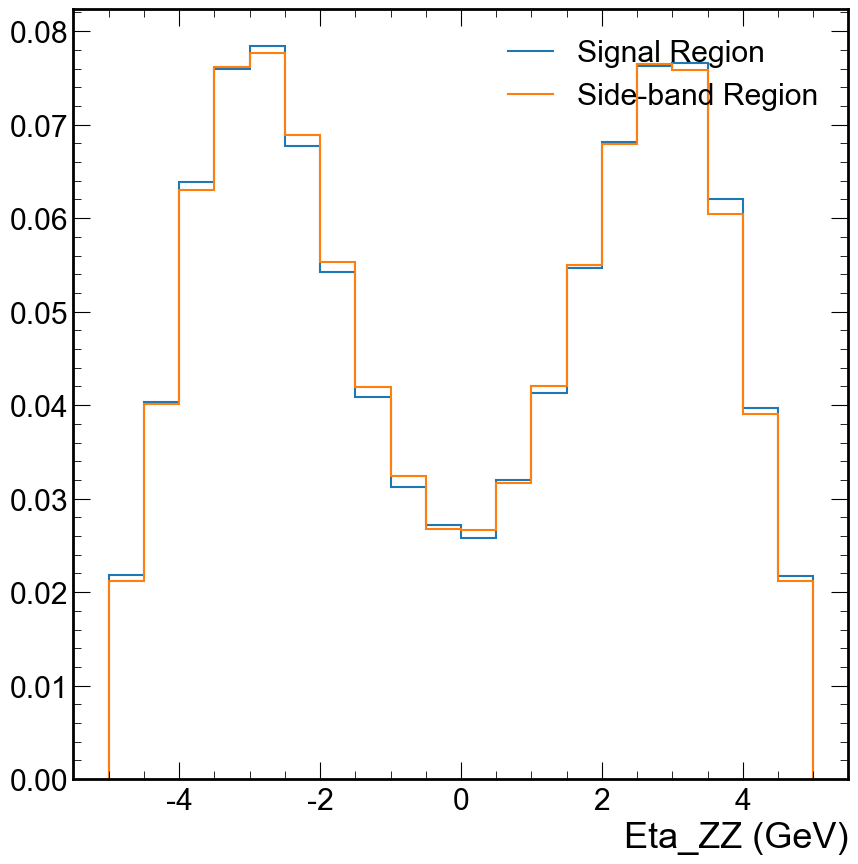

In [43]:
h_SR.plot1d(density=True,label = 'Signal Region')
h_SB.plot1d(density=True,label = 'Side-band Region')
#legend
plt.legend()
#
plt.xlabel("Eta_ZZ (GeV)")


### different pt cut 

In [5]:
### different pt cut 

#200-400
selection = "((ptmerged>200) & (ptmerged<400) & (massmerged>70) & (massmerged<105)) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)"
arr_cut_200 = {}
for sample in samples:
    cut = ak.numexpr.evaluate(selection,arr[sample])
    arr_cut_200[sample] = arr[sample][cut]
    

#400-600
selection = "((ptmerged>400) & (ptmerged<600) & (massmerged>70) & (massmerged<105)) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)"
arr_cut_400 = {}
for sample in samples:
    cut = ak.numexpr.evaluate(selection,arr[sample])
    arr_cut_400[sample] = arr[sample][cut]

#400-600
selection = "((ptmerged>600) & (massmerged>70) & (massmerged<105)) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)"
arr_cut_600 = {}
for sample in samples:
    cut = ak.numexpr.evaluate(selection,arr[sample])
    arr_cut_600[sample] = arr[sample][cut]

In [33]:
#make cut
category = 'merged'
arr_cut = {}
#selection = "((mass2jet>105) & (mass2jet<135)) & (foundZ1LCandidate==True) & (foundZ2JCandidate==True)" if category == 'resolved' else "((massmerged>70) & (massmerged<105)) & (particleNetZvsQCD>0.9) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)"
selection = "((mass2jet>105) & (mass2jet<135)) & (foundZ1LCandidate==True) & (foundZ2JCandidate==True)" if category == 'resolved' else "((ptmerged>600) &(massmerged>70) & (massmerged<105)) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)"
#selection = "((mass2jet>70) & (mass2jet<105)) & (foundZ1LCandidate==True) & (foundZ2JCandidate==True)" if category == 'resolved' else "((mass2jet>70) & (mass2jet<105)) & (particleNetZvsQCD>0.9) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)"

#samples = ['DY_pt50To100','DY_pt100To250','DY_pt250To400','DY_pt400To650','DY_pt650ToInf','TTTo2L2Nu','WWTo2L2Nu','WZTo2Q2L','ZZTo2Q2L','WWTo1L1Nu2Q','tZq','ZZTo2L2Nu','WZTo1L1Nu2Q','ZH_HToBB']
#samples = ['WZTo2Q2L','ZZTo2Q2L']
for sample in samples:
    cut = ak.numexpr.evaluate(selection,arr[sample])
    arr_cut[sample] = arr[sample][cut]


In [10]:
#make hist for ZV
varb = 'particleNetZvsQCD';lumi = config['lumi'][year]

h_200 = hist.Hist(hist.axis.Regular(50, 0, 1))
for sample in samples:
    xsec = config['samples_inf'][sample][1]
    h_200.fill(arr_cut_200[sample][varb],
                   weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000*{xsec}/{sumweight[sample]}',arr_cut_200[sample])
                  )

h_400 = hist.Hist(hist.axis.Regular(50, 0, 1))
for sample in samples:
    xsec = config['samples_inf'][sample][1]
    h_400.fill(arr_cut_400[sample][varb],
                   weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000*{xsec}/{sumweight[sample]}',arr_cut_400[sample])
                  )

h_600 = hist.Hist(hist.axis.Regular(50, 0, 1))
for sample in samples:
    xsec = config['samples_inf'][sample][1]
    h_600.fill(arr_cut_600[sample][varb],
                   weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000*{xsec}/{sumweight[sample]}',arr_cut_600[sample])
                  )


In [109]:
#fill hist
#varb = 'mass2l2jet'
varb = 'KD_Zjj'
lumi = config['lumi'][year]
edge = hist.axis.Variable([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
        900.,  950., 1000., 1050., 1100., 1150., 1200., 1300., 1400.,
       1500., 1600., 2000., 2400., 3000., 3500., 5000.])

temp_bin1 = np.linspace(0,1200,25)
#temp_bin2 = np.array([1300,1400,1500,1600,2000,2400,3000,3500,5000])
temp_bin2 = np.array([1300,1400,1500,1600,3500])
bins = np.concatenate((temp_bin1,temp_bin2))
massZZ_bins = hist.axis.Variable(ak.from_numpy(bins).to_list())

h = {}
for sample in samples:
    xsec = config['samples_inf'][sample][1]
    #h[sample] = hist.Hist(edge)
    #h[sample] = hist.Hist(setting().massZZ_bins['merged'],hist.axis.Regular(10, 0, 1))
    h[sample] = hist.Hist(massZZ_bins,hist.axis.Regular(10, 0, 1))
    h[sample].fill(arr_cut[sample]['mass2l2jet'],
                   arr_cut[sample][varb],
                   weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000*{xsec}/{sumweight[sample]}',arr_cut[sample])
                  )


In [8]:
def plot_1d_data_mc(hist_dir,case,isdata = False,isdensity = False):
    r'''
        input: hist_dir, case, isdata, isdensity
        output: plot the histograms with hep.histplot
        case = 'resolved' or 'merged'
        isdata = True or False (default False)
        isdensity = True or False (default False)
    '''
    #create a list to stroe all keys in hist_dir as sample names except 'data'
    sample_names = [sample for sample in hist_dir.keys() if sample != 'data']
    #create a list to store all values in hist_dir as the histograms except 'data'
    histo_mc  = [hist_dir[sample] for sample in sample_names]
    #plot the mc histograms via hep.histplot
    #label is the list of sample names with retriving the number of events in each histogram
    #colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown','black']
    labels = ["{} ({})".format(sample,round(hist_dir[sample].values().sum(),4),'.4f') for sample in sample_names]
    if isdensity:
        #hep.histplot(histo_mc,label=labels, density=True,linewidth=1,color = [color for color in colors] )
        hep.histplot(histo_mc,label=labels, density=True,linewidth=1)
    else:
        hep.histplot(histo_mc,stack=True,label=labels,histtype='fill', edgecolor='k', linewidth=1,)
    
    if isdata:
        hep.histplot(hist_dir['Data'],label='Data', color='k', histtype='errorbar', linewidth=1.5,markersize=15)
    #set the x-axis label
    #plt.xlabel('M(2l2q) [GeV]')
    #plt.xlabel('particleNetZvsQCD')
    plt.xlabel('pt(ll)')
    #set the y-axis label
    plt.ylabel('Events')
    #set the legend
    plt.legend(loc='upper right',fontsize=10,fancybox=True,shadow=True)
    #set title with size
    #plt.title(f'Estimate M(2l2q) distribution in SR in {case} category with all possible backgrounds',fontsize=10)
    #plt.title(f'particleNetZvsQCD scroe with ZV process in pt range 600 To Inf GeV',fontsize=10)
    plt.title(f'pt2l',fontsize=10)

In [127]:
h['ggh1000'].view(flow = True)[22,:]

array([0.        , 1.63396094, 1.57335807, 1.11713383, 0.89091764,
       1.05910025, 0.82553924, 1.07044326, 1.02576179, 0.72195013,
       1.15036316, 0.        ])

In [114]:
edge = massZZ_bins
for i in range(0,len(edge)):
    hist_dir = {
        'TT,tZq':(h["TTTo2L2Nu"]+h['tZq'])[i,:],
        'ZV,WW':(h['WZTo2Q2L']+h['ZZTo2Q2L']+h["WWTo2L2Nu"])[i,:],
        'Z+jet':(h['DY_pt50To100']+h['DY_pt100To250']+h['DY_pt250To400']+h['DY_pt400To650']+h['DY_pt650ToInf'])[i,:],
        'ggH1000':(h['ggh1000'])[i,:],
        #'ggH500':(h['ggh500'])[i,:],
        #'ggH2000':(h['ggh2000'])[i,:],
        'sig':(h['sig'])[i,:],
    }
    #plot  mini_1d_hist
    plot_1d_data_mc(hist_dir,'resolved')
    plt.savefig(f'./Zjj_massZZ_resolved_{edge.edges[i]}To{edge.edges[i+1]}.png')
    plt.close()

/cms/user/guojl/miniconda/envs/uprootframe/lib/python3.8/site-packages/mplhep/utils.py:263: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(self.values))
/cms/user/guojl/miniconda/envs/uprootframe/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/cms/user/guojl/miniconda/envs/uprootframe/lib/python3.8/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/cms/user/guojl/miniconda/envs/uprootframe/lib/python3.8/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/cms/user/guojl/miniconda/envs/uprootframe/lib/python3.8/site-packages/mplhep/utils.py:245: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/cms/user/guojl/miniconda/envs/uprootframe/lib/python3.8/site-packages/mplhep/utils.py:263: RuntimeWarn

In [38]:
hist_dir = {
    #'TT,tZq':h["TTTo2L2Nu"]+h['tZq'],
    #'WWTo2L2Nu':h["WWTo2L2Nu"],
    #'ZV,WW':h['WZTo2Q2L']+h['ZZTo2Q2L']+h["WWTo2L2Nu"],
    #'Z+jet':h['DY_pt50To100']+h['DY_pt100To250']+h['DY_pt250To400']+h['DY_pt400To650']+h['DY_pt650ToInf'],
    #'ggH1000':h['ggh1000'],
    #'ggH500':h['ggh500'],
    #'ggH2000':h['ggh2000'],
    #'sig':h['sig'],
    #'ZH_HToBB':h['ZH_HToBB'],
    #'Data':h['Data']
    #'WWTo1L1Nu2Q':h['WWTo1L1Nu2Q'],
    #'tZq':h['tZq'],
    #'ZZTo2L2Nu':h['ZZTo2L2Nu'],
    #'WZTo1L1Nu2Q':h['WZTo1L1Nu2Q'],
    'ZV Pt(200-400 GeV)':h_200,
    'ZV Pt(400-600 GeV)':h_400,
    'ZV Pt(200-400 GeV)':h_200,
    
}

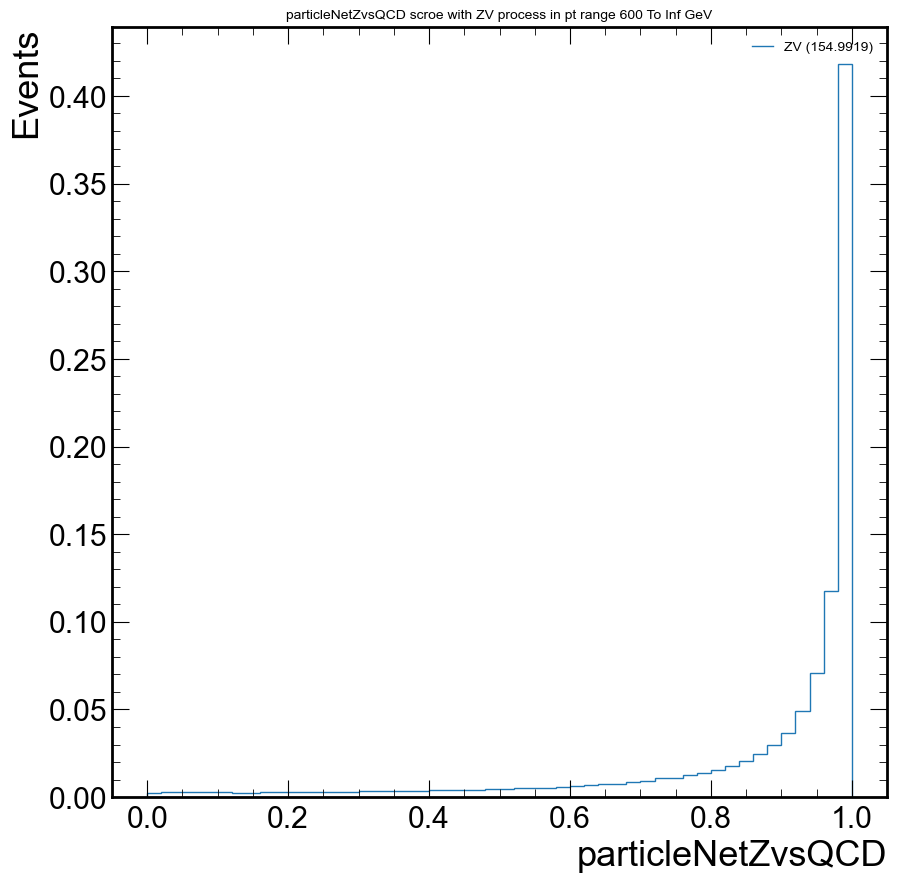

In [39]:
plot_1d_data_mc(hist_dir,'merged')

### check significance

In [56]:
hist_bkg = h["TTTo2L2Nu"]+h["WWTo2L2Nu"]+h['WZTo2Q2L']+h['ZZTo2Q2L']+h['DY_pt50To100']+h['DY_pt100To250']+h['DY_pt250To400']+h['DY_pt400To650']+h['DY_pt650ToInf']
hit_sig = h['ggh1000']

In [57]:
hit_sig.values().sum()/np.sqrt(hit_sig.values().sum()+hist_bkg.values().sum())

14.972126654316805

## lepton id and efficience uncertainty

In [57]:
tags = ['untag','vbftag','btag']
arr_cut = {}; process = 'ggh'; channel = 'isMuMu'; channel_map = {'isMuMu':"muons", 'isEE':'electrons'}
for tag in tags:
    arr_cut[tag] = {}
    selection = config['cut']['SR'][channel_map[channel]]['resolved'][tag]
    arr_cut[tag]['resolved'] = make_cut(selection,arr[process])

    selection = config['cut']['SR'][channel_map[channel]]['merged'][tag]
    arr_cut[tag]['merged'] = make_cut(selection,arr[process])
selection = config['cut']['SR'][channel]['resolved']['all']
arr_cut['resolved'] = make_cut(selection,arr[process])

selection = config['cut']['SR'][channel]['merged']['all']
arr_cut['merged'] = make_cut(selection,arr[process])

In [58]:
#fill hist
masszz = {'resolved':'mass2l2jet','merged':'mass2lj'}
lumi = config['lumi']['2018']
bins = 60; start = 0; stop = 3000
h = {}
h['mean'] = hist.Hist(hist.axis.Regular(bins, start, stop))
h['up'] = hist.Hist(hist.axis.Regular(bins, start, stop))
h['down'] = hist.Hist(hist.axis.Regular(bins, start, stop))

for case in ['resolved','merged']:
    xsec = config['samples_inf']['ggh'][1]
    h['mean'].fill(
        arr_cut[case][masszz[case]],
        #weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000/{sumweight["ggh"]}',arr_cut[case])
        weight = ak.numexpr.evaluate(f'EventWeight',arr_cut[case])
    )
    h['up'].fill(
        arr_cut[case][masszz[case]],
        #weight = ak.numexpr.evaluate(f'EventWeight_up*{lumi}*1000/{sumweight["ggh"]}',arr_cut[case])
        weight = ak.numexpr.evaluate(f'EventWeight_up',arr_cut[case])
    )
    h['down'].fill(
        arr_cut[case][masszz[case]],
        #weight = ak.numexpr.evaluate(f'EventWeight_dn*{lumi}*1000*{xsec}/{sumweight["ggh"]}',arr_cut[case])
        weight = ak.numexpr.evaluate(f'EventWeight_dn',arr_cut[case])
    )

Text(1500, 15500.630396336317, '= +0.0028/-0.0028 in zv process')

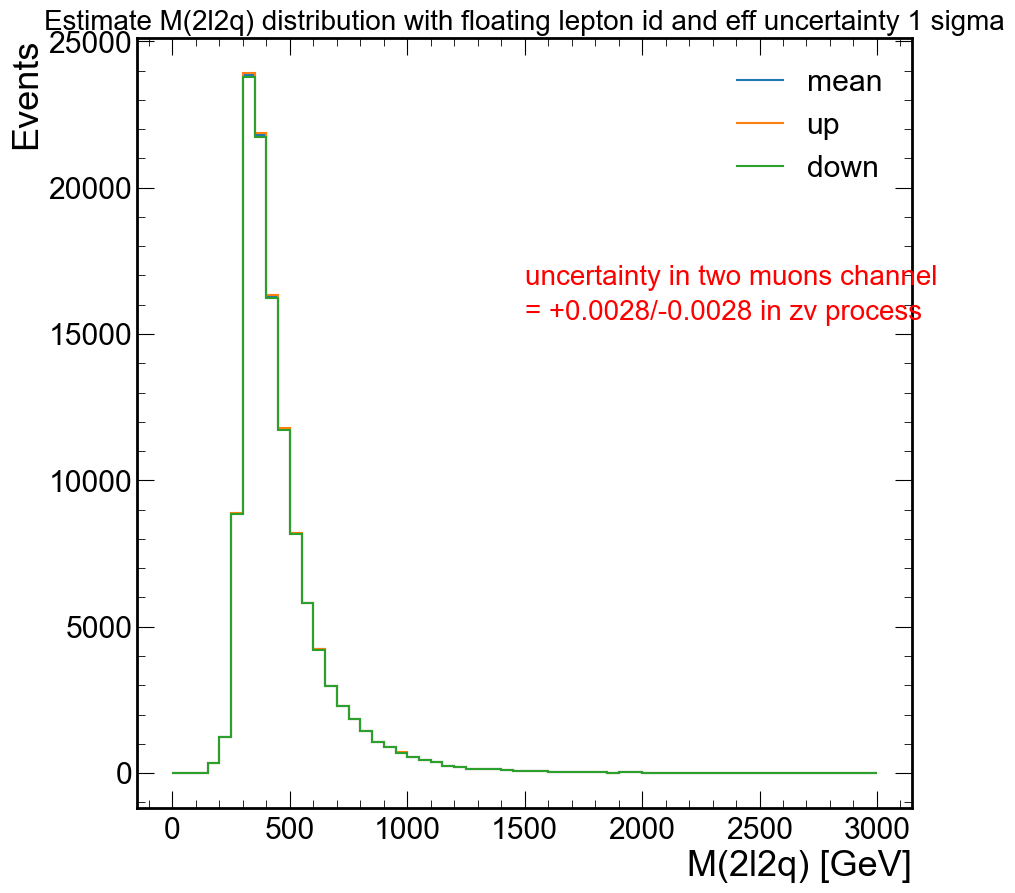

In [59]:
#plot
h['mean'].plot1d(density=False,label='mean')
h['up'].plot1d(density=False,label='up')
h['down'].plot1d(density=False,label='down')

plt.xlabel('M(2l2q) [GeV]')
plt.ylabel('Events')
plt.legend()
plt.title('Estimate M(2l2q) distribution with floating lepton id and eff uncertainty 1 sigma',fontsize=20)

#add difference of up and down with showing a text in plot
n_mean = h['mean'].values().sum()
n_up = h['up'].values().sum()
n_down = h['down'].values().sum()

diff_up = abs(n_up-n_mean)/n_mean
diff_down = abs(n_down-n_mean)/n_mean

#crab the max value of y-axis
max_y = max(h['mean'].values())
plt.text(1500, max_y*0.7, f'uncertainty in two {channel_map[channel]} channel', fontsize=20,color = 'red')
plt.text(1500, max_y*0.65,f"= +{diff_up:.4f}/-{diff_down:.4f} in {process} process", fontsize=20,color='red')

In [60]:
plt.close()


In [13]:
masszz = {'resolved':'mass2l2jet','merged':'mass2lj'}
lumi = config['lumi']['2018']
bins = 60; start = 0; stop = 3000

tags = ['untag','vbftag','btag']
arr_cut = {}; process = 'ggh'; channel = 'isMuMu'; channel_map = {'isMuMu':"muons", 'isEE':'electrons'}
for tag in tags:
    arr_cut[tag] = {}
    for case in ['resolved','merged']:
        selection = config['cut']['SR'][channel][case][tag]
        arr_cut[tag][case] = make_cut(selection,arr[process])

        #fill hist
        h = {}
        h['mean'] = hist.Hist(hist.axis.Regular(bins, start, stop))
        h['up'] = hist.Hist(hist.axis.Regular(bins, start, stop))
        h['down'] = hist.Hist(hist.axis.Regular(bins, start, stop))

        xsec = config['samples_inf']['ggh'][1]
        h['mean'].fill(
            arr_cut[tag][case][masszz[case]],
            #weight = ak.numexpr.evaluate(f'EventWeight*{lumi}*1000/{sumweight["ggh"]}',arr_cut[case])
            weight = ak.numexpr.evaluate(f'EventWeight',arr_cut[tag][case])
        )
        h['up'].fill(
            arr_cut[tag][case][masszz[case]],
            #weight = ak.numexpr.evaluate(f'EventWeight_up*{lumi}*1000/{sumweight["ggh"]}',arr_cut[case])
            weight = ak.numexpr.evaluate(f'EventWeight_up',arr_cut[tag][case])
        )
        h['down'].fill(
            arr_cut[tag][case][masszz[case]],
            #weight = ak.numexpr.evaluate(f'EventWeight_dn*{lumi}*1000*{xsec}/{sumweight["ggh"]}',arr_cut[case])
            weight = ak.numexpr.evaluate(f'EventWeight_dn',arr_cut[tag][case])
        )

        #plot
        h['mean'].plot1d(density=False,label='mean')
        h['up'].plot1d(density=False,label='up')
        h['down'].plot1d(density=False,label='down')

        plt.xlabel('M(2l2q) [GeV]')
        plt.ylabel('Events')
        plt.legend()

        plt.title(f'Estimate M(2l2q) distribution in SR in {channel_map[channel]} channel with {tag} category in {case}',fontsize=20)

        #add difference of up and down with showing a text in plot
        n_mean = h['mean'].values().sum()
        n_up = h['up'].values().sum()
        n_down = h['down'].values().sum()

        diff_up = abs(n_up-n_mean)/n_mean
        diff_down = abs(n_down-n_mean)/n_mean

        #crab the max value of y-axis
        max_y = max(h['mean'].values())

        plt.text(1500, max_y*0.7, f'uncertainty in two {channel_map[channel]} channel in {case} in {tag}', fontsize=20,color = 'red')
        plt.text(1500, max_y*0.65,f"= +{diff_up:.4f}/-{diff_down:.4f} in {process} process", fontsize=20,color='red')

        #print the text
        print(f'uncertainty in two {channel_map[channel]} channel in {case} in {tag} = +{diff_up:.6f}/-{diff_down:.6f} in {process} process')

        #save plot
        plt.savefig(f'/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/papercomments/plots/{year}/massZZ_{process}_{case}_{channel_map[channel]}_{tag}.png')
        plt.close()

    

uncertainty in two muons channel in resolved in untag = +0.002748/-0.002744 in ggh process
uncertainty in two muons channel in merged in untag = +0.002448/-0.002445 in ggh process


/tmp/ipykernel_8289/1925175321.py:52: RuntimeWarning: invalid value encountered in double_scalars
  diff_up = abs(n_up-n_mean)/n_mean
/tmp/ipykernel_8289/1925175321.py:53: RuntimeWarning: invalid value encountered in double_scalars
  diff_down = abs(n_down-n_mean)/n_mean


uncertainty in two muons channel in resolved in vbftag = +nan/-nan in ggh process


/tmp/ipykernel_8289/1925175321.py:52: RuntimeWarning: invalid value encountered in double_scalars
  diff_up = abs(n_up-n_mean)/n_mean
/tmp/ipykernel_8289/1925175321.py:53: RuntimeWarning: invalid value encountered in double_scalars
  diff_down = abs(n_down-n_mean)/n_mean


uncertainty in two muons channel in merged in vbftag = +nan/-nan in ggh process
uncertainty in two muons channel in resolved in btag = +0.002670/-0.002666 in ggh process
uncertainty in two muons channel in merged in btag = +0.002424/-0.002421 in ggh process


In [ ]:
plt.close()

### JES/JER uncertainty

In [74]:
arr_cut = {}
#selection = '(Met<=150) & ((mass2jet_up>70) & (mass2jet_up<105)) & (foundZ1LCandidate==True) & (foundZ2JCandidate_up==True)'
selection = '(Met<=150) & ((massmerged_up>70) & (massmerged_up<105)) & (particleNetZvsQCD_up>0.9) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)'
arr_cut['up'] = make_cut(selection,arr['ggh'])

#selection = '(Met<=150) & ((mass2jet_dn>70) & (mass2jet_dn<105)) & (foundZ1LCandidate==True) & (foundZ2JCandidate_dn==True)'
selection = '(Met<=150) & ((massmerged_dn>70) & (massmerged_dn<105)) & (particleNetZvsQCD_dn>0.9) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata_up==True)'
arr_cut['dn'] = make_cut(selection,arr['ggh'])

#selection = '(Met<=150) & ((mass2jet>70) & (mass2jet<105)) & (foundZ1LCandidate==True) & (foundZ2JCandidate==True)'
selection = '(Met<=150) & ((massmerged>70) & (massmerged<105)) & (particleNetZvsQCD>0.9) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)'
arr_cut['mean'] = make_cut(selection,arr['ggh'])


ValueError: key "Met" does not exist (not in record)

(https://github.com/scikit-hep/awkward-1.0/blob/1.8.0/src/libawkward/util.cpp#L525)

In [19]:
n_up = len(arr_cut['up'].mass2lj_up)
n_dn = len(arr_cut['dn'].mass2lj_dn)
n_mean = len(arr_cut['mean'].mass2lj)

err_up = abs(n_up-n_mean)/n_mean
err_dn = abs(n_dn-n_mean)/n_mean

print(f'err_up = {err_up}')
print(f'err_dn = {err_dn}')

err_up = 0.16323949964009882
err_dn = 0.14923253506604672


In [63]:
ak.flatten(arr['ggh'].mergedjet_jesup_mass[0:100])


<Array [104, 111, 103, ... 111, 103, 82.1] type='74 * float32'>

In [70]:
err = ak.flatten(arr['ggh'].mergedjet_jesup_mass[0:1000]) - ak.flatten(arr['ggh'].mergedjet_mass[0:1000])

In [71]:
sum(err)/len(err)

0.0

In [62]:
sum(ak.flatten(arr['ggh'].mergedjet_jer_pterr))/len(ak.flatten(arr['ggh'].mergedjet_jer_pterr))

0.07056170020169092